# Self Study 4: Fixed Points and Stability

## Section 1: Linear Stability Analysis

In this section, you will create a Python function to analyze the fixed points and their stability.

In [1]:
# Import libraries
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Task 1: Function to Find Fixed Points

Write a Python function, `find_fixed_points`, that takes an ODE function and initial guesses for fixed points, and returns the calculated fixed points.

   **Hint**: Use `fsolve` from `scipy.optimize` to find the fixed points based on your initial guesses.


In [2]:
def find_fixed_points(ode_func, initial_guesses):
    fixed_points = []
    for guess in initial_guesses:
        # Use fsolve to find the root
        result = fsolve(ode_func, guess)
        fixed_points.extend(result)
    return fixed_points

### Task 2: Function for Linear Stability Analysis

Write another Python function, `linear_stability_analysis`, that takes an ODE function, its fixed points, and returns the stability type ("Stable" or "Unstable") of each fixed point.

**Hint**: Perturb the fixed point by a small value $\Delta$ and check the sign of the ODE.


http://www.scholarpedia.org/w/images/d/db/Equilibrium_figure_1d.gif

In [3]:
def linear_stability_analysis(ode_func, fixed_points, delta=1e-3):
    stability = []
    for point in fixed_points:
        perturbed_point_up = point + delta
        perturbed_point_down = point - delta
        
        # Calculate derivatives at perturbed points
        deriv_up = ode_func(perturbed_point_up, None)
        deriv_down = ode_func(perturbed_point_down, None)
        
        if deriv_up > 0 and deriv_down < 0:
            stability.append("Unstable")
        elif deriv_up < 0 and deriv_down > 0:
            stability.append("Stable")
        else:
            stability.append("Cannot determine")
    return stability

### Task 3: Combine Into `stability` Function

Combine `find_fixed_points` and `linear_stability_analysis` into a single function named `stability`. This function should take an ODE and initial guesses for fixed points, and print out each fixed point along with its stability type.


In [4]:
def stability(ode_func, initial_guesses, delta=1e-3):
    # Find fixed points
    fixed_points = find_fixed_points(ode_func, initial_guesses)
    
    # Analyze stability
    stability_types = linear_stability_analysis(ode_func, fixed_points, delta)
    
    # Print results
    for i, point in enumerate(fixed_points):
        print(f"Fixed Point {i + 1}: {point:.4f}, Stability: {stability_types[i]}")


### Task 4: Explore Various ODEs

### Example 1: Logistic Equation

Use the `stability` function to analyze the logistic equation:

$$
\frac{dN}{dt} = rN \left(1 - \frac{N}{K}\right)
$$

### Example 2: Exponential Growth

Use the `stability` function to analyze the exponential growth equation:

$$
\frac{dN}{dt} = rN
$$

### Example 3: A function of your choice


In [5]:
# Example 1: Logistic Equation
def logistic_eq(N, t=None):
    r = 0.1  # Growth rate
    K = 100  # Carrying capacity
    return r * N * (1 - N / K)

print("Logistic Equation Stability Analysis:")
stability(logistic_eq, initial_guesses=[0, 200])


Logistic Equation Stability Analysis:
Fixed Point 1: 0.0000, Stability: Unstable
Fixed Point 2: 100.0000, Stability: Stable


In [6]:
# Example 2: Exponential Growth
def exponential_growth(N, t=None):
    r = 0.1  # Growth rate
    return r * N

print("\nExponential Growth Stability Analysis:")
stability(exponential_growth, initial_guesses=[0, 10])


Exponential Growth Stability Analysis:
Fixed Point 1: 0.0000, Stability: Unstable
Fixed Point 2: 0.0000, Stability: Unstable


## Section 2: A Labor Market Example



#### Background

The dynamics of the labor market can be modeled by the following system of equations:

The rate of change of wage ($ w $) is dependent on the difference between labor demand ($ l^d $) and labor supply ($ l^s $):

$$
\dot{w} = \beta (l^d - l^s)
$$
where $ \beta $ is a positive constant.

Labor demand decreases linearly with wage:
$$
l^d(w) = \mu - \gamma w
$$
where $\mu$ and $\gamma$ are positive constants.

Labor supply is a function of wage and is influenced by the "negative income effect":
   * As wages increase, income increases, leading to a greater demand for leisure and a decrease in labor supply after a certain point.

### Part 1: Setup

 **Labor Supply and Demand Functions**: Write a Python function `labor_supply(w, alpha, delta)` that models $ l^s(w) $ using a quadratic function.
   - The function should initially increase with $ w $ but should decrease after reaching a peak (i.e., a quadatic function `alpha * x - delta * x**2`).
   
Labour demand decreases linearly with wage: $ l^d(w) = \mu - \gamma w $ where $ \mu $ and $ \gamma $ are positive constants.

In [7]:
def labor_supply(w, alpha, delta):
    # Your code here
    l_s = alpha * w - delta * w ** 2
    return l_s

def labor_demand(w, mu, gamma):
    return mu - gamma * w

**Wage Dynamics**: Write a Python function `wage_dynamics(w, beta, mu, gamma, alpha, delta)` that returns $ \dot{w} $ based on the given $ w $ and parameters.

In [8]:
def wage_dynamics(w, beta, mu, gamma, alpha, delta):
    ld = labor_demand(w, mu, gamma)
    ls = labor_supply(w, alpha, delta)
    return beta * (ld - ls)


In [9]:
# Define parameters for the example
beta = 1
mu = 10
gamma = 1
alpha = 2
delta = 0.1

**Visualization**: Plot $ \dot{w} $ as a function of $ w $ for different sets of parameters $ \beta, \mu, \gamma, \alpha, \delta $. **Hint**: use `ipywidgets` interact

In [10]:
# Your code for plotting here

from ipywidgets import interact
# Create wage values for plotting

@interact
def plot_wage_dynamics(beta=1., mu=10, gamma=1, alpha=2, delta=0.1):
    # Calculate wage dynamics for these wage values
    w_values = np.linspace(0, 30, 100)
    dw_dt_values = wage_dynamics(w_values, beta, mu, gamma, alpha, delta)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(w_values, dw_dt_values, label=f'beta={beta}, mu={mu}, gamma={gamma}, alpha={alpha}, delta={delta}')
    plt.axhline(0, color='black', linewidth=1)
    plt.xlabel('Wage (w)')
    plt.ylabel('Rate of change of wage (dw/dt)')
    plt.title('Wage Dynamics')
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='beta', max=3.0, min=-1.0), IntSlider(value=10, descr…

### Section 3: Fixed Points and Stability (Labour Market)

Solve the system of equations to find the fixed points, either analytically or using `sympy` (see [sympy documentation](https://docs.sympy.org/latest/modules/solvers/solvers.html#system-of-nonlinear-equations)).


$$
\dot{w} = \beta (l^d - l^s) = \beta (\mu - \gamma w - (\alpha w - \delta w^2))
$$

To find the equilibrium points, we need to solve $ \dot{w} = 0 $. This gives us:

$$
\beta (\mu - \gamma w - (\alpha w - \delta w^2)) = 0
$$
$$
\mu - \gamma w - \alpha w + \delta w^2 = 0
$$
$$
\delta w^2 - (\gamma + \alpha) w + \mu = 0
$$

In [11]:
from sympy import symbols, solve

# Define variables and parameters
w = symbols('w')

# Define the equation for equilibrium
equilibrium_eq = delta * w ** 2 - (gamma + alpha) * w + mu

# Solve for equilibrium wage
equilibrium_wage = solve(equilibrium_eq, w)
equilibrium_wage

[3.81966011250105, 26.1803398874989]

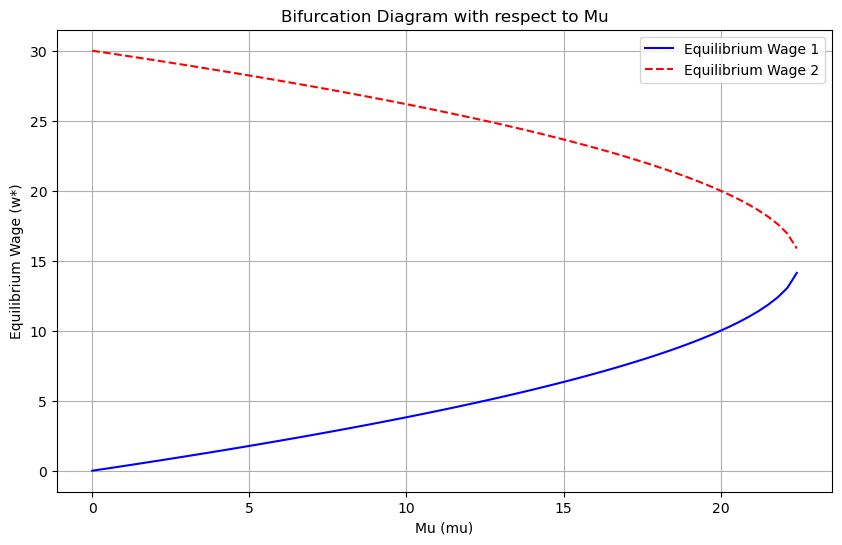

In [12]:
# Define a range of mu values for the bifurcation analysis
mu_values = np.linspace(0, 30,100)

# Initialize lists to store equilibrium wages
equilibrium_wages_mu_1 = []
equilibrium_wages_mu_2 = []

# Loop through each mu value and solve for equilibrium wages
for mu in mu_values:
    equilibrium_wage = solve(delta * w ** 2 - (gamma + alpha) * w + mu, w)

    try:
        # Append existing equilibria; use None if equilibrium does not exist
        equilibrium_wages_mu_1.append(float(equilibrium_wage[0]) if len(equilibrium_wage) > 0 else None)
        equilibrium_wages_mu_2.append(float(equilibrium_wage[1]) if len(equilibrium_wage) > 1 else None)
    except TypeError:
        equilibrium_wages_mu_1.append(None)
        equilibrium_wages_mu_2.append(None)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mu_values, equilibrium_wages_mu_1, label='Equilibrium Wage 1', markersize=5, linestyle='-', color='blue')
plt.plot(mu_values, equilibrium_wages_mu_2, label='Equilibrium Wage 2', markersize=5, linestyle='--', color='red')
plt.xlabel('Mu (mu)')
plt.ylabel('Equilibrium Wage (w*)')
plt.title('Bifurcation Diagram with respect to Mu')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
wage_d = lambda w, t=None: wage_dynamics(w, beta, 15, gamma, alpha, delta)

stability(wage_d, initial_guesses=[0, 15])

Fixed Point 1: 6.3397, Stability: Stable
Fixed Point 2: 23.6603, Stability: Unstable
